# Coursework 1: Image filtering

In this coursework you will practice image filtering techniques, which are commonly used to smooth, sharpen or add certain effects to images. 
The coursework includes both coding questions and written questions. Please read both the text and code comment in this notebook to get an idea what you are expected to implement.

## What to do?

* Complete and run the code using `jupyter-lab` or `jupyter-notebook` to get the results.

* Export (File | Export Notebook As...) or print (using the print function of your browser) the notebook as a pdf file, which contains your code, results and text answers, and upload the pdf file onto [Cate](https://cate.doc.ic.ac.uk).

## Dependencies:

If you do not have Jupyter-Lab on your laptop, you can find information for installing Jupyter-Lab [here](https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html).

There may be certain Python packages you may want to use for completing the coursework. We have provided examples below for importing libraries. If some packages are missing, you need to install them. In general, new packages (e.g. imageio etc) can be installed by running 

`pip3 install [package_name]`

in the terminal. If you use Anaconda, you can also install new packages by running `conda install [package_name]` or using its graphic user interface.

In [1]:
# Import libaries (provided)
import imageio
import numpy as np
import matplotlib.pyplot as plt
import noise
import scipy
import scipy.signal
import math
import time

## 1. Moving average filter (20 points).

Read a specific input image and add noise to the image. Design a moving average filter of kernel size 3x3 and 11x11 respectively. Perform image filtering on the noisy image.

Design the kernel of the filter by yourself. Then perform 2D image filtering using the function `scipy.signal.convolve2d()`.

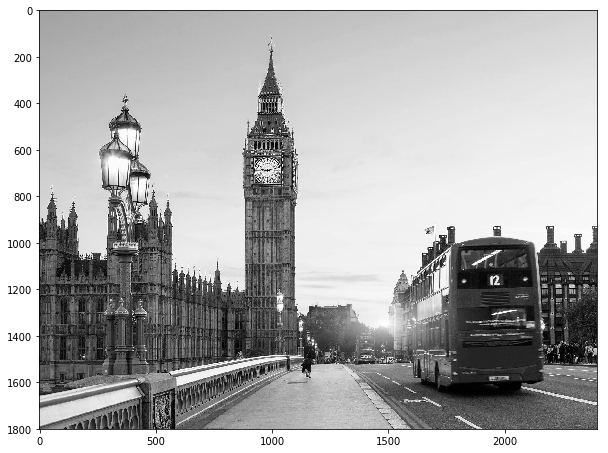

In [2]:
# Read the image (provided)
image = imageio.imread('london.jpg')
plt.imshow(image, cmap='gray')
plt.gcf().set_size_inches(10, 8)

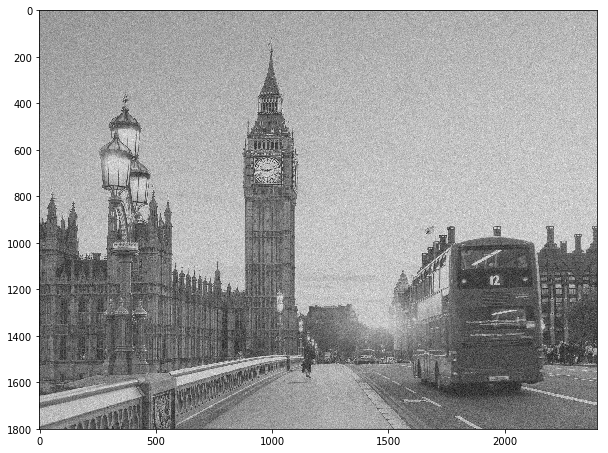

In [3]:
# Corrupt the image with Gaussian noise (provided)
image_noisy = noise.add_noise(image, 'gaussian')
plt.imshow(image_noisy, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### Note: from now on, please use the noisy image as the input for the filters.

### 1.1 Filter the noisy image with a 3x3 moving average filter. Show the filtering results. (5 points)

Filter h:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


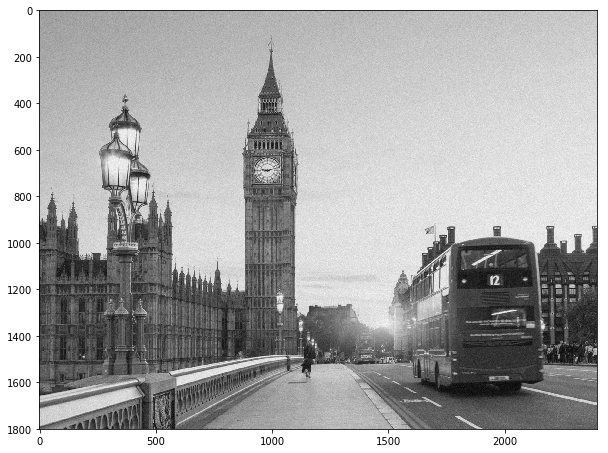

In [4]:
# Design the filter h
h = np.ones((3, 3))/9

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h, mode = 'same')

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 1.2 Filter the noisy image with a 11x11 moving average filter. (5 points)

Filter h:
[[0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.008

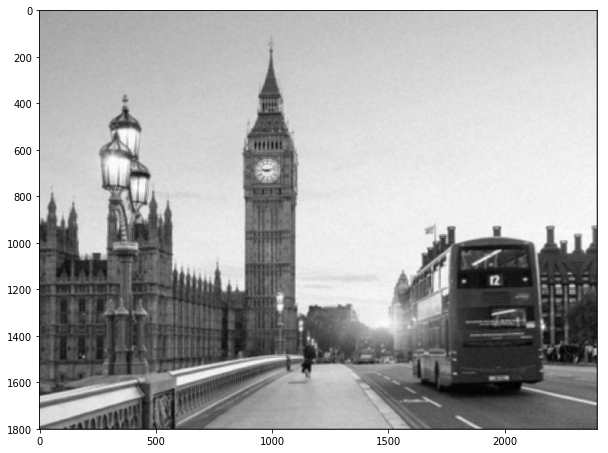

In [5]:
# Design the filter h
h = np.ones((11, 11))/121

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h, mode = 'same')

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 1.3 Comment on the filtering results. How do different kernel sizes influence the filtering results? (10 points)

Larger moving average kernels(11x11) have more pixel values factored into the average hence they result in blurrier(smoother transition in pixel intensity) image as compared to the results of smaller kernels(3x3).

## 2. Edge detection (65 points).

Perform edge detection using Sobel filters, as well as Gaussian + Sobel filters for edge detection.

### 2.1 Implement 3x3 Sobel filters and convolve with the noisy image. (10 points)

h_sobel_x:
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
h_sobel_y:
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


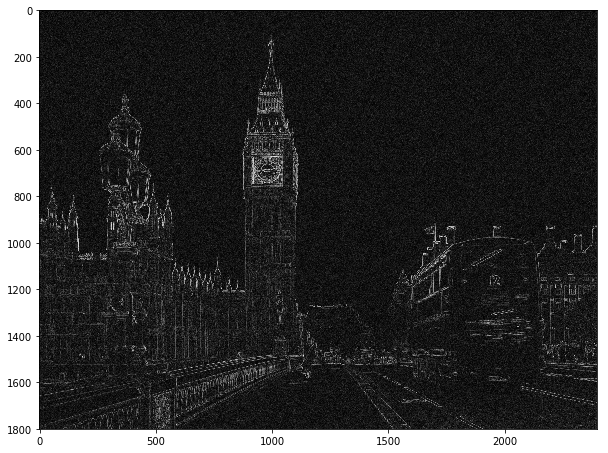

In [6]:
# Design the Sobel filters
h_sobel_x = np.array([[1, 0, -1],
                      [2, 0, -2],
                      [1, 0, -1]])
h_sobel_y = np.array([[1, 2, 1],
                      [0, 0, 0],
                      [-1, -2, -1]])

# Sobel filtering
res_x = scipy.signal.convolve2d(image_noisy, h_sobel_x, mode = 'same')
res_y = scipy.signal.convolve2d(image_noisy, h_sobel_y, mode = 'same')


# Calculate the gradient magnitude
sobel_mag = np.sqrt(res_x**2 + res_y**2)

# Print the filters (provided)
print('h_sobel_x:')
print(h_sobel_x)
print('h_sobel_y:')
print(h_sobel_y)

# Display the magnitude image (provided)
plt.imshow(sobel_mag, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 2.2 Implement a function that generates a 2D Gaussian filter given the parameter $\sigma$. (10 points)

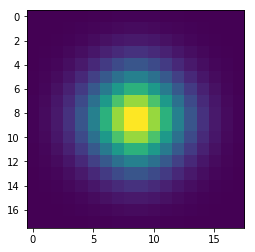

In [7]:
# Design the Gaussian filter
def gaussian_filter_2d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 2D array for the Gaussian kernel
    # specify k as 3 or 4
    k = 3
    l = k*sigma
    y = np.array([i*np.ones((l,)) for i in range(1, l+1)])
    x = y.T
    
    # create the 4th quadrant and flip and concatenate other quadrants    
    h = np.exp(-(x**2+y**2)/(2*sigma**2))/(2*np.pi*sigma**2)
    tmp = np.concatenate((np.flip(h), np.flip(h, axis=1)))
    h = np.concatenate((tmp, np.flip(tmp)), axis=1)
    return h

# Visualise the Gaussian filter when sigma = 3 pixel (provided)
sigma = 3
h = gaussian_filter_2d(sigma)

plt.imshow(h)

### 2.3 Perform Gaussian smoothing ($\sigma$ = 3 pixels), followed by Sobel filtering, show the gradient magnitude image. (7 points)

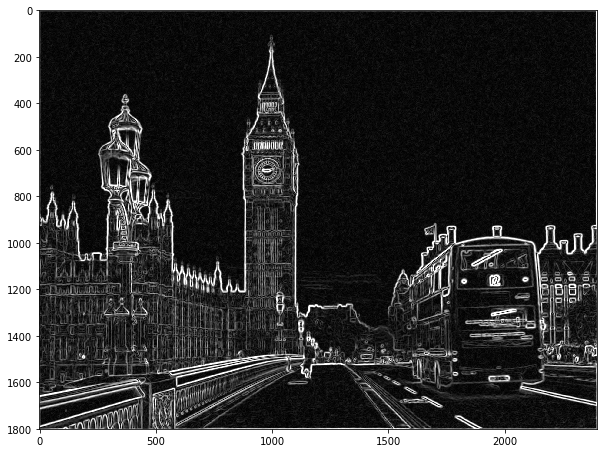

In [8]:
# Perform Gaussian smoothing before Sobel filtering
sigma = 3
gaussian_filter = gaussian_filter_2d(sigma)
temp_image = scipy.signal.convolve2d(image_noisy, gaussian_filter, mode = 'same')

# Sobel filtering
res_x = scipy.signal.convolve2d(temp_image, h_sobel_x, mode='same')
res_y = scipy.signal.convolve2d(temp_image, h_sobel_y, mode='same')

# Calculate the gradient magnitude
sobel_mag = np.sqrt(res_x**2 + res_y**2)

# Display the magnitude image (provided)
plt.imshow(sobel_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

### 2.4 Perform Gaussian smoothing ($\sigma$ = 7 pixels) and evaluate the computational time for Gaussian smoothing. After that, perform Sobel filtering. (9 points)

time taken for gaussian smoothing is 25.89574670791626


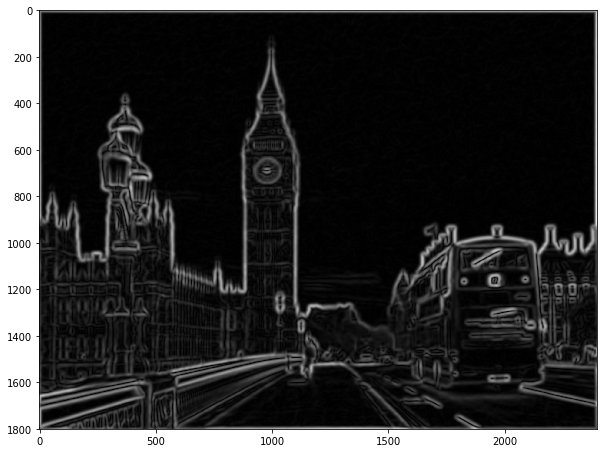

In [9]:
# Construct the Gaussian filter
sigma = 7
gaussian_filter = gaussian_filter_2d(sigma)

# Perform Gaussian smoothing and count time
start_time = time.time()
temp_image = scipy.signal.convolve2d(image_noisy, gaussian_filter, mode = 'same')
print("time taken for gaussian smoothing is", time.time() - start_time)

# Sobel filtering
res_x = scipy.signal.convolve2d(temp_image, h_sobel_x, mode = 'same')
res_y = scipy.signal.convolve2d(temp_image, h_sobel_y, mode = 'same')

# Calculate the gradient magnitude
sobel_mag = np.sqrt(res_x**2 + res_y**2)

# Display the magnitude image (provided)
plt.imshow(sobel_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

### 2.5 Implement a function that generates a 1D Gaussian filter given the parameter $\sigma$. Generate 1D Gaussian filters along x-axis and y-axis respectively. (10 points)

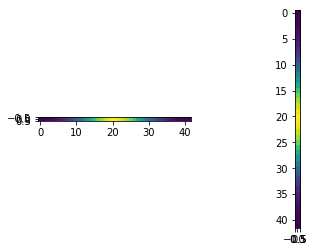

In [10]:
# Design the Gaussian filter
def gaussian_filter_1d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 1D array for the Gaussian kernel
    k = 3
    l = k*sigma
    x = np.arange(l, 0, -1)
    halfFilter = np.exp(-(x**2)/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma)
    h = np.concatenate((halfFilter, np.flip(halfFilter))).reshape((1, -1))
    return h

# sigma = 7 pixel (provided)
sigma = 7

# The Gaussian filter along x-axis. Its shape is (1, sz).
h_x = gaussian_filter_1d(sigma)

# The Gaussian filter along y-axis. Its shape is (sz, 1).
h_y = gaussian_filter_1d(sigma).T

# Visualise the filters (provided)
plt.subplot(1, 2, 1)
plt.imshow(h_x)
plt.subplot(1, 2, 2)
plt.imshow(h_y)

### 2.6 Perform Gaussian smoothing (sigma = 7 pixels) using two separable filters and evaluate the computational time for separable Gaussian filtering. After that, perform Sobel filtering and show results. (9 points)

time taken for separated gaussian smoothing is 2.29237699508667


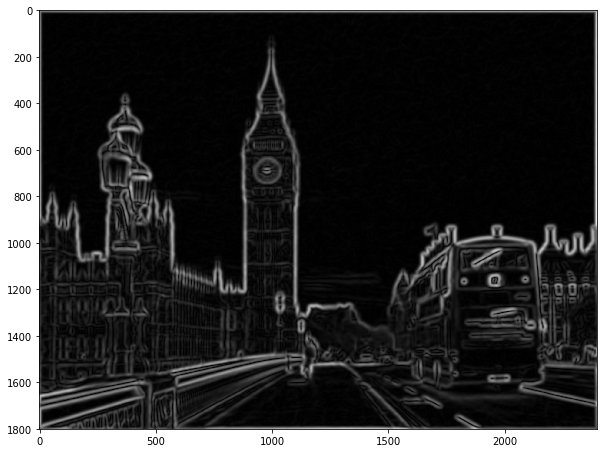

In [11]:
# Perform separable Gaussian smoothing and count time
start_time = time.time()
temp_image = scipy.signal.convolve2d(image_noisy, h_y, mode = 'same')
temp_image = scipy.signal.convolve2d(temp_image, h_x, mode = 'same')
print("time taken for separated gaussian smoothing is", time.time() - start_time)

# Sobel filtering
res_x = scipy.signal.convolve2d(temp_image, h_sobel_x, mode = 'same')
res_y = scipy.signal.convolve2d(temp_image, h_sobel_y, mode = 'same')

# Calculate the gradient magnitude
sobel_mag = np.sqrt(res_x**2 + res_y**2)

# Display the magnitude image (provided)
plt.imshow(sobel_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

### 2.7 Comment on the Gaussian + Sobel filtering results and the computational time. (10 points)

Sobel filters detects the edges of the noisy image. Having applied different sizes of Gaussian smoothing kernels on the result from Sobel filters, we note that

1. In general, the edges detected becomes thicker but their intensities are reduced. This makes sense as Gaussian smoothing kernel is a weighted (moving) average kernel with the average weighted towards the centre of the kernel. Hence, it spreads out the intensity from the thin edges to the neighbourhood pixels.

2. Gaussian filters with larger sigma (sigma=7) have greater smoothing effect, essentially they thicken the lines and reduce their intensities even more than Gaussian filters with smaller sigma (sigma=3).

In terms of computational time, we note that convolution by separated Gaussian filters is much more faster than convolution by one single non-separated Gaussian filter. The resulting image is the same for both convolutions. Hence, running convolutions on separated filters is much more efficient.

## 3. Challenge: Implement the 3x3 moving average filter using Pytorch. (15 points)

[Pytorch](https://pytorch.org/) is a machine learning framework that supports filtering and convolution.

The [Conv2D](https://pytorch.org/docs/stable/nn.html#conv2d) operator takes an input array of dimension NxC1xXxY, applies the filter and outputs an array of dimension NxC2xXxY. Here, since we only have one image with one colour channel, we will set N=1, C1=1 and C2=1. You can read the documentation of Conv2D for more detail.

In [12]:
# Import libaries (provided)
import torch

### 3.1 Expand the dimension of the noisy image into 1x1xXxY and convert it to a Pytorch tensor. (5 points)

In [13]:
# Expand the dimension of the numpy array
rows = image_noisy.shape[0]
cols = image_noisy.shape[1]
image_noisy = image_noisy.reshape((1,1,rows, cols))


# Convert to a Pytorch tensor using torch.from_numpy
image_noisy = torch.from_numpy(image_noisy)

### 3.2 Create a Pytorch Conv2D filter, set its kernel to be a 3x3 moving averaging filter. (5 points)

In [14]:
# Create the Conv2D filter (provided)
conv = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=1, bias=False)

# Set the kernel weight
conv.weight.data = torch.nn.Parameter(torch.ones((1,1,3,3))/9)


### 3.3 Apply the filter to the noisy image tensor and display the output image. (5 points)

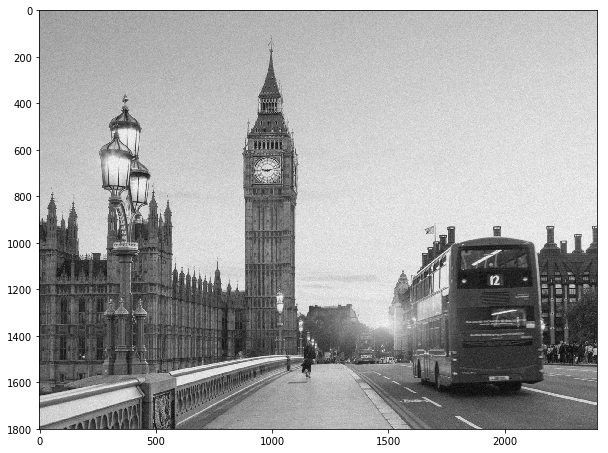

In [15]:
# Filtering
image_filtered = conv(image_noisy.float())

# Display the filtering result (provided)
plt.imshow(image_filtered.detach().numpy().reshape((rows, cols)), cmap='gray')
plt.gcf().set_size_inches(10, 8)

## 4. Survey: How long does it take you to complete the coursework?
A whole evening. But much time spent to figure out what went wrong in 2.6, turns out I used the 2D formula for 1D gaussian filter. Without that at most 2 hours.